# Final project proposal: Tag recommendations
This project is intended to fulfil a real-world use-case, with the goal to make this project production-ready to be incorporated into software engineering workflows. 

The objective is to develop a text classification solution for tags added to the content on an online knowledge-management platform (think of the tags added to pictures on Pinterest, and the underlying machine learning tag recommendation algorithms behind it), to group and cluster tags by themes as well as to make recommendations on similar and related tags (by text distance and semantically, ideally).

In [1]:
# Import libraries
import textdistance, pandas as pd, random

In [2]:
# Load the data
tags = pd.read_csv('full_raw_tags.csv')
tags

,id,name,created_at,updated_at
0,1,typescript,2020-12-23 14:40:25.918+00,2020-12-23 14:40:25.918+00
1,3,handbook,2020-12-23 14:41:35.594+00,2020-12-23 14:41:35.594+00
2,4,github,2020-12-23 14:43:00.849+00,2020-12-23 14:43:00.849+00
3,5,repo,2020-12-23 14:43:00.85+00,2020-12-23 14:43:00.85+00
4,6,tutorial,2020-12-23 14:44:55.831+00,2020-12-23 14:44:55.831+00
...,...,...,...,...
371,374,series A,2021-06-10 13:11:39.098+00,2021-06-10 13:11:39.098+00
372,375,series C,2021-06-10 13:25:09.59+00,2021-06-10 13:25:09.59+00
373,376,experts,2021-06-11 06:11:58.205+00,2021-06-11 06:11:58.205+00
374,377,motivation,2021-06-13 05:47:07.751+00,2021-06-13 05:47:07.751+00


In [3]:
int = random.randint(1,200)
## Pull out a random value
#tag1 = tags['Name'].values[int]
## Or assign a specific tag
tag1 = 'startup'
tag1

'startup'

In [4]:
# Build a column of the tag1 value, to compare text distance
tags['Input'] = tag1
tag_column = tags['Input']
full_tags = tags['name']

In [5]:
# Calculate the text distance score, we use Jaccard similarity here in this example
for i in tags.index:
    tags.loc[i,['Score']] = textdistance.jaccard(tags['name'][i], tags['Input'][i])
tags = tags.sort_values(by='Score', ascending=False)
tags

,id,name,created_at,updated_at,Input,Score
10,13,startup,2020-12-24 03:22:04.528+00,2020-12-24 03:22:04.528+00,startup,1.000000
302,305,startups,2021-05-11 08:17:05.798+00,2021-05-11 08:17:05.798+00,startup,0.875000
92,95,bootstrap,2021-01-08 10:15:27.986+00,2021-01-08 10:15:27.986+00,startup,0.600000
5,7,starter,2020-12-23 14:48:28.196+00,2020-12-23 14:48:28.196+00,startup,0.555556
272,275,anti trust,2021-04-23 03:58:38.98+00,2021-04-23 03:58:38.98+00,startup,0.545455
...,...,...,...,...,...,...
247,250,MBA,2021-04-02 04:47:31.985+00,2021-04-02 04:47:31.985+00,startup,0.000000
334,337,PRD,2021-05-18 15:36:01.044+00,2021-05-18 15:36:01.044+00,startup,0.000000
251,254,GMAT,2021-04-02 04:49:54.426+00,2021-04-02 04:49:54.426+00,startup,0.000000
260,263,vc,2021-04-20 10:29:20.874+00,2021-04-20 10:29:20.874+00,startup,0.000000


In [6]:
# We save the top 5 tags by similarity to a new list, and print out this recommendation
recommended_tags = tags['name'].iloc[1:6].tolist()
print("You entered: " + tag1 + ". Did you mean: " + ', '.join(recommended_tags) + "?")

You entered: startup. Did you mean: startups, bootstrap, starter, anti trust, strategy?


# Clustering of tags

In [9]:
import nltk, gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
# We tokenize the list of tags, in order to allow the Word2Vec model to run on it. We store the model in a new variable

#x= tags['Input'].values.tolist()
y= tags['name'].values.tolist()
corpus = y
tok_corp = [nltk.word_tokenize(sent) for sent in corpus]
model = gensim.models.Word2Vec(tok_corp, min_count=1)

In [11]:
# These lines can be run to see what the model is picking up from the dataset, using the underlying Word2Vec model

# model.wv.most_similar(positive=['startup'], negative=['analytics'])
# model.wv['startup']
# print(model.wv.similarity('startup', 'startups'))

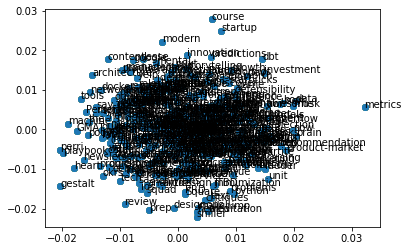

In [12]:
# We now try to to plot and run clusters of the tags, based on the underlying Word2Vec model applied. This can be further
# refined, perhaps based on changing the embedded model

X = model.wv[model.wv.key_to_index]
words = list(model.wv.index_to_key)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
for i, word in enumerate(words):
    plt.scatter(result[:, 0], result[:, 1])
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))